<a href="https://colab.research.google.com/github/softwarerbfl/imageProcessing/blob/main/Notebook-Week13/2022_1_ImgProc_HW13_%EB%B0%B0%EA%B7%9C%EB%A6%AC_32202018.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 영상정보처리 13주차 과제 템플리트

    
이름: 배규리            
학번: 32202018

입력 이미지: 자유



# 구글 드라이브 마우팅 및 작업 경로로 이동
- 다음 쉘에 필요한 작업을 하시오. 

In [1]:
from google.colab import drive 
drive.mount('/gdrive')
%cd /gdrive/My\ Drive/Colab\ Notebooks/2022_영상정보처리/Notebook-Week\ 13
from google.colab.patches import cv2_imshow
import matplotlib.cm as cm
import numpy as np

Mounted at /gdrive
/gdrive/My Drive/Colab Notebooks/2022_영상정보처리/Notebook-Week 12


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# matplot color display
def show_with_matplotlib_jh(img, title):
    if img is None:
      print("show_with_matplotlib: Could not read the image.")
      return

    if img.shape[2] != 3:
      print()
      print("show_with_matplotlib: given image does not contains 3 channels")
      return

    # Convert BGR image to RGB:
    img_RGB = img[:, :, ::-1]

    # Show the image using matplotlib:
    plt.imshow(img_RGB)
    plt.title(title)
    plt.show()

# matplot grayscale display
def show_with_matplotlib_gray_jh(img, title):
   if img is None:
      print("show_with_matplotlib_gray: Could not read the image.")
      return

   if img.ndim > 2:
      print()
      print("show_with_matplotlib: given image has more than 2 dim")
      return
      
   plt.imshow(img, cmap="gray")
   plt.title(title)
   plt.show()

def show_with_matplotlib_MO4(color_img, title, pos, axis_show):
    # Convert BGR image to RGB
    img_RGB = color_img[:, :, ::-1]

    ax = plt.subplot(3, 6, pos)
    plt.imshow(img_RGB)
    plt.title(title)
    
    if not axis_show:
      plt.axis('off')

    plt.show()

In [4]:
image_path='../Dongkeun-OpenCV-ImgData/chessboard2.jpg'
src=cv2.imread(image_path)
gray=cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

##문제 1
수업 시간에 배운 다음의 방법들을 함수화 하고, 자유롭게 선택된 이미지를 이용하여 테스트 하시오.



1.   HoughLinesP 를 이용한 직선 성분 찾기
2.   contour 관련 함수들
  - 하나의 세그먼트에 대한 외곽선 그리기
  - 하나의 이미지에 있는 모든 세그먼트에 대한 외곽선 그리기 
  - 하나의 세그먼트에 대한 외곽선 그리기 영역 계산하기 
  - 하나의 컨투어에 대한 centroid 찾기
  - 하나의 컨투어에 대한 bounding rectangle 찾기
  - 하나의 컨투어에 대한 rotated rectangle 찾기
  - 하나의 컨투어에 대한 convex hull 찾기
  - 하나의 컨투어에 대한 convexity defects 찾기
  









lines.shape= (180, 1, 4)


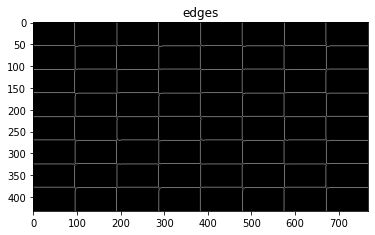

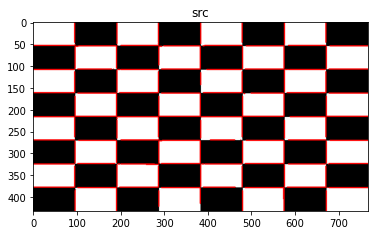

In [10]:
#1 HoughLinesP를 이용한 직선 성분 찾기
edges=cv2.Canny(gray,50,100)
lines=cv2.HoughLinesP(edges,rho=1,theta=np.pi/180.0,
                      threshold=20)
print('lines.shape=',lines.shape)
for line in lines:
  x1,y1,x2,y2=line[0]
  cv2.line(src,(x1,y1),(x2,y2),(0,0,255),2)
show_with_matplotlib_gray_jh(edges,"edges")
show_with_matplotlib_jh(src,"src")


In [12]:
def duplicated_rect():
  src=np.zeros(shape=(512,512,3),dtype=np.uint8)
  cv2.rectangle(src,(50,100),(450,400),(255,255,255),-1)
  cv2.rectangle(src,(100,150),(400,350),(0,0,0),-1)
  cv2.rectangle(src,(200,200),(300,300),(255,255,255),-1)
  gray=cv2.cvtColor(src,cv2.COLOR_BGR2GRAY)
  return src,gray

2-(1) 하나의 세그먼트에 대한 외곽선 그리기

In [16]:
def getExternelContour(src,gray):
  mode=cv2.RETR_EXTERNAL
  method=cv2.CHAIN_APPROX_SIMPLE
  contours, hierarchy=cv2.findContours(gray,mode,method)
  cv2.drawContours(src,contours,-1,(255,0,0),3)
  return src, contours

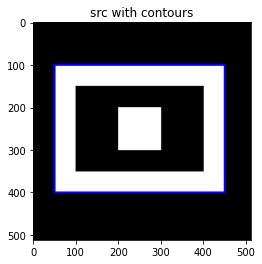

In [17]:
src,gray=duplicated_rect()
src_contoured,contours=getExternelContour(src,gray)
show_with_matplotlib_jh(src_contoured,"src with contours")

2-(2) 하나의 이미지에 있는 모든 세그먼트에 대한 외곽선 그리기

In [18]:
def getListContour(src,gray):
  mode=cv2.RETR_LIST
  method=cv2.CHAIN_APPROX_SIMPLE
  contours, hierarchy=cv2.findContours(gray,mode,method)
  count=0
  for cnt in contours:
    count=count+1
    cv2.drawContours(src,[cnt],0,(255,0,0),3)
  return src,contours

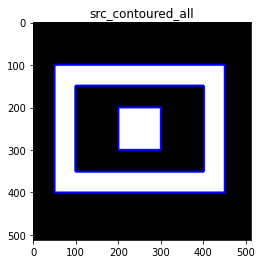

In [19]:
src,gray=duplicated_rect()
src_contoured_all,contours=getListContour(src,gray)
show_with_matplotlib_jh(src_contoured_all,"src_contoured_all")

2-(3) 하나의 세그먼트에 대한 외곽선 그리기 영역 계산하기

In [21]:
def getContourArea(contours):
  for cnt in contours:
    area=cv2.contourArea(cnt)
  return area 

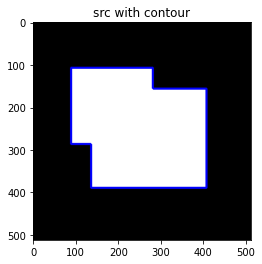

78662.0


In [24]:
src=cv2.imread('../Dongkeun-OpenCV-ImgData/momentTest.jpg')
gray=cv2.cvtColor(src,cv2.COLOR_BGR2GRAY)
ret,img_binary=cv2.threshold(gray,127,255,0)
src_contoured,contours=getExternelContour(src,img_binary)
show_with_matplotlib_jh(src_contoured,"src with contour")
area=getContourArea(contours)
print(area)

2-(4) 하나의 컨투어에 대한 centroid 찾기

In [27]:
def getCentroid(src,contours):
  for cnt in contours:
    M=cv2.moments(cnt)
    cx=int(M['m10']/M['m00'])
    cy=int(M['m10']/M['m00'])
    cv2.circle(src,(cx,cy),10,(0,0,255),-1)
  return src

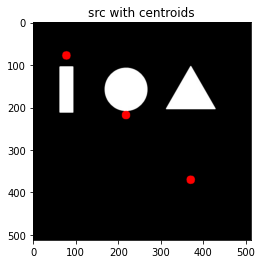

In [37]:
img_color=cv2.imread('../Dongkeun-OpenCV-ImgData/refShapes.jpg')
img_color=cv2.bitwise_not(img_color)
#show_with_matplotlib_jh(img_color,"img")
img_gray=cv2.cvtColor(img_color,cv2.COLOR_BGR2GRAY)

ret,img_binary=cv2.threshold(img_gray,127,255,0)
contours,hierarchy=cv2.findContours(img_binary, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

src_get_centroid=getCentroid(img_color, contours)
show_with_matplotlib_jh(src_get_centroid,"src with centroids")

2-(5) 하나의 컨투어에 대한 bounding rectangle 찾기

In [43]:
def getBoundingRect(src,contours):
  for cnt in contours:
    x,y,w,h=cv2.boundingRect(cnt)
    cv2.rectangle(src,(x,y),(x+w,y+h),(0,255,0),2)
  return src

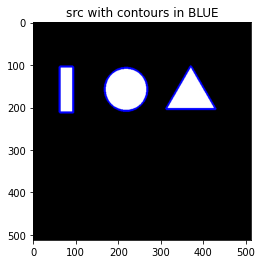

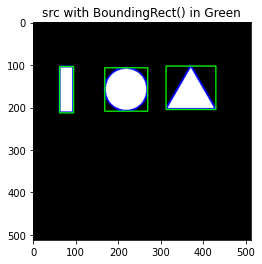

In [45]:
image_path="../Dongkeun-OpenCV-ImgData/refShapes.jpg"
img_color=cv2.imread(image_path)
img_color=cv2.bitwise_not(img_color)
img_gray=cv2.cvtColor(img_color,cv2.COLOR_BGR2GRAY)

ret,img_binary=cv2.threshold(img_gray,127,255,0)
src_contoured_all,contours=getListContour(img_color,img_binary)
show_with_matplotlib_jh(src_contoured_all,"src with contours in BLUE")

src_bounding_rect=getBoundingRect(src_contoured_all,contours)
show_with_matplotlib_jh(src_bounding_rect,"src with BoundingRect() in Green")

2-(6) 하나의 컨투어에 대한 rotated rectangle 찾기



In [46]:
def getRotatedRect(src,contours):
  i=0
  for cnt in contours:
    rect=cv2.minAreaRect(cnt)
    box=cv2.boxPoints(rect)
    box=np.int0(box)
    if i==0:
      print('type=',type(rect),"rect=",rect)
      print("box=",box)
    i=i+1
    cv2.drawContours(src,[box],0,(0,0,255),2)
  return src

type= <class 'tuple'> rect= ((218.0, 157.5), (100.0, 101.0), -0.0)
box= [[168 208]
 [168 107]
 [268 107]
 [268 208]]


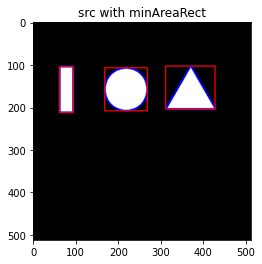

In [47]:
image_path="../Dongkeun-OpenCV-ImgData/refShapes.jpg"
img_color=cv2.imread(image_path)
img_color=cv2.bitwise_not(img_color)
img_gray=cv2.cvtColor(img_color,cv2.COLOR_BGR2GRAY)

ret,img_binary=cv2.threshold(img_gray, 127,255,0)
src_contoured_all,contours=getListContour(img_color, img_binary)
src_rotated_rect=getRotatedRect(src_contoured_all,contours)
show_with_matplotlib_jh(img_color,"src with minAreaRect")

2-(7) 하나의 컨투어에 대한 convex hull 찾기

In [48]:
def getConvexHull(src,contours):
  for cnt in contours:
    hull=cv2.convexHull(cnt)
    cv2.drawContours(src,[hull],0,(255,0,255),5)
  return src

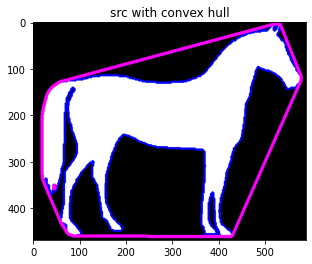

In [51]:
image_path="../Dongkeun-OpenCV-ImgData/horse_bw.png"
img_color=cv2.imread(image_path)
img_gray=cv2.cvtColor(img_color,cv2.COLOR_BGR2GRAY)

ret,img_binary=cv2.threshold(img_gray,128,255,0)
src_contoured_all,contours=getListContour(img_color,img_binary)
src_convex_hull=getConvexHull(src_contoured_all,contours)

show_with_matplotlib_jh(img_color,"src with convex hull")

2-(8) 하나의 컨투어에 대한 convexity defects 찾기

In [91]:
def getConvexityDefect(src,contours):
  icnt=0
  for cnt in contours:
    hull=cv2.convexHull(cnt,returnPoints=False)
    defects=cv2.convexityDefects(cnt,hull)

    if icnt==0:
     # print("cnt.shape=",cnt.shape,"cnt=",cnt)
     # print("hull.shape=",hull.shape)
      thull=hull
     # print("max value in hull=",max(thull.flatten()),"min value=",min(thull.flatten()))
     # print("hull=",hull)
     # print("defects[0].shape=",defects[0].shape,"defects[0]=",defects[0])
    icnt=icnt+1

    #print(defects)
    
    for i in range(defects.shape[0]):
      s,e,f,d=defects[i,0]
      start=tuple(cnt[s][0])
      end=tuple(cnt[e][0])
      far=tuple(cnt[f][0])
      #print("distance=",d)

      if d>500:
        cv2.line(img_color,start,end,(0,255,0),5)
        cv2.circle(img_color,far,5,(0,0,255),-1)
        title="src with defects i="+str(i)
    
  return src

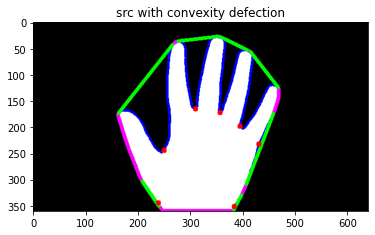

In [92]:
image_path="../Dongkeun-OpenCV-ImgData/contour_test.png"
img_color=cv2.imread(image_path)
img_gray=cv2.cvtColor(img_color,cv2.COLOR_BGR2GRAY)

ret,img_binary=cv2.threshold(img_gray,128,255,0)
src_contoured_all,contours=getListContour(img_color,img_binary)

src_convex_hull=getConvexHull(src_contoured_all,contours)

src_convexity_defection=getConvexityDefect(img_color,contours)

show_with_matplotlib_jh(src_convexity_defection,"src with convexity defection")